In [1]:
# Script para obtener los tamaños de las regiones del dataset

In [2]:
import os 
import numpy as np
from util_loads import loadMask
from scipy.stats import skew,kurtosis
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.pyplot import figure
%matplotlib inline 
from scipy.ndimage import label, generate_binary_structure


In [3]:
layer_dataset = './dataset/MICROCYSTS/'
file_list = [layer_dataset + x for x in os.listdir(layer_dataset) if not x.startswith('.') and 'jupyter' not in x.lower()]

In [4]:
def assignLabel(mask):
    results = []
    
    s = generate_binary_structure(2,2)
    label_structures, num_features = label(mask, s)

    for connected_component_id in [x+1 for x in range(num_features)]:
        current_component = label_structures == connected_component_id
        csize = np.nansum(current_component)
        #if csize > 5:
        results.append(csize)
    return results

Mean:  285.713726586525
Median:  35.0
Skewness:  25.14479880542183
Kurtosis:  799.136594665603
Mode:  2
Std:  1894.4346575566428
Median + std:  2876.651986334964
Median - std:  -2806.651986334964


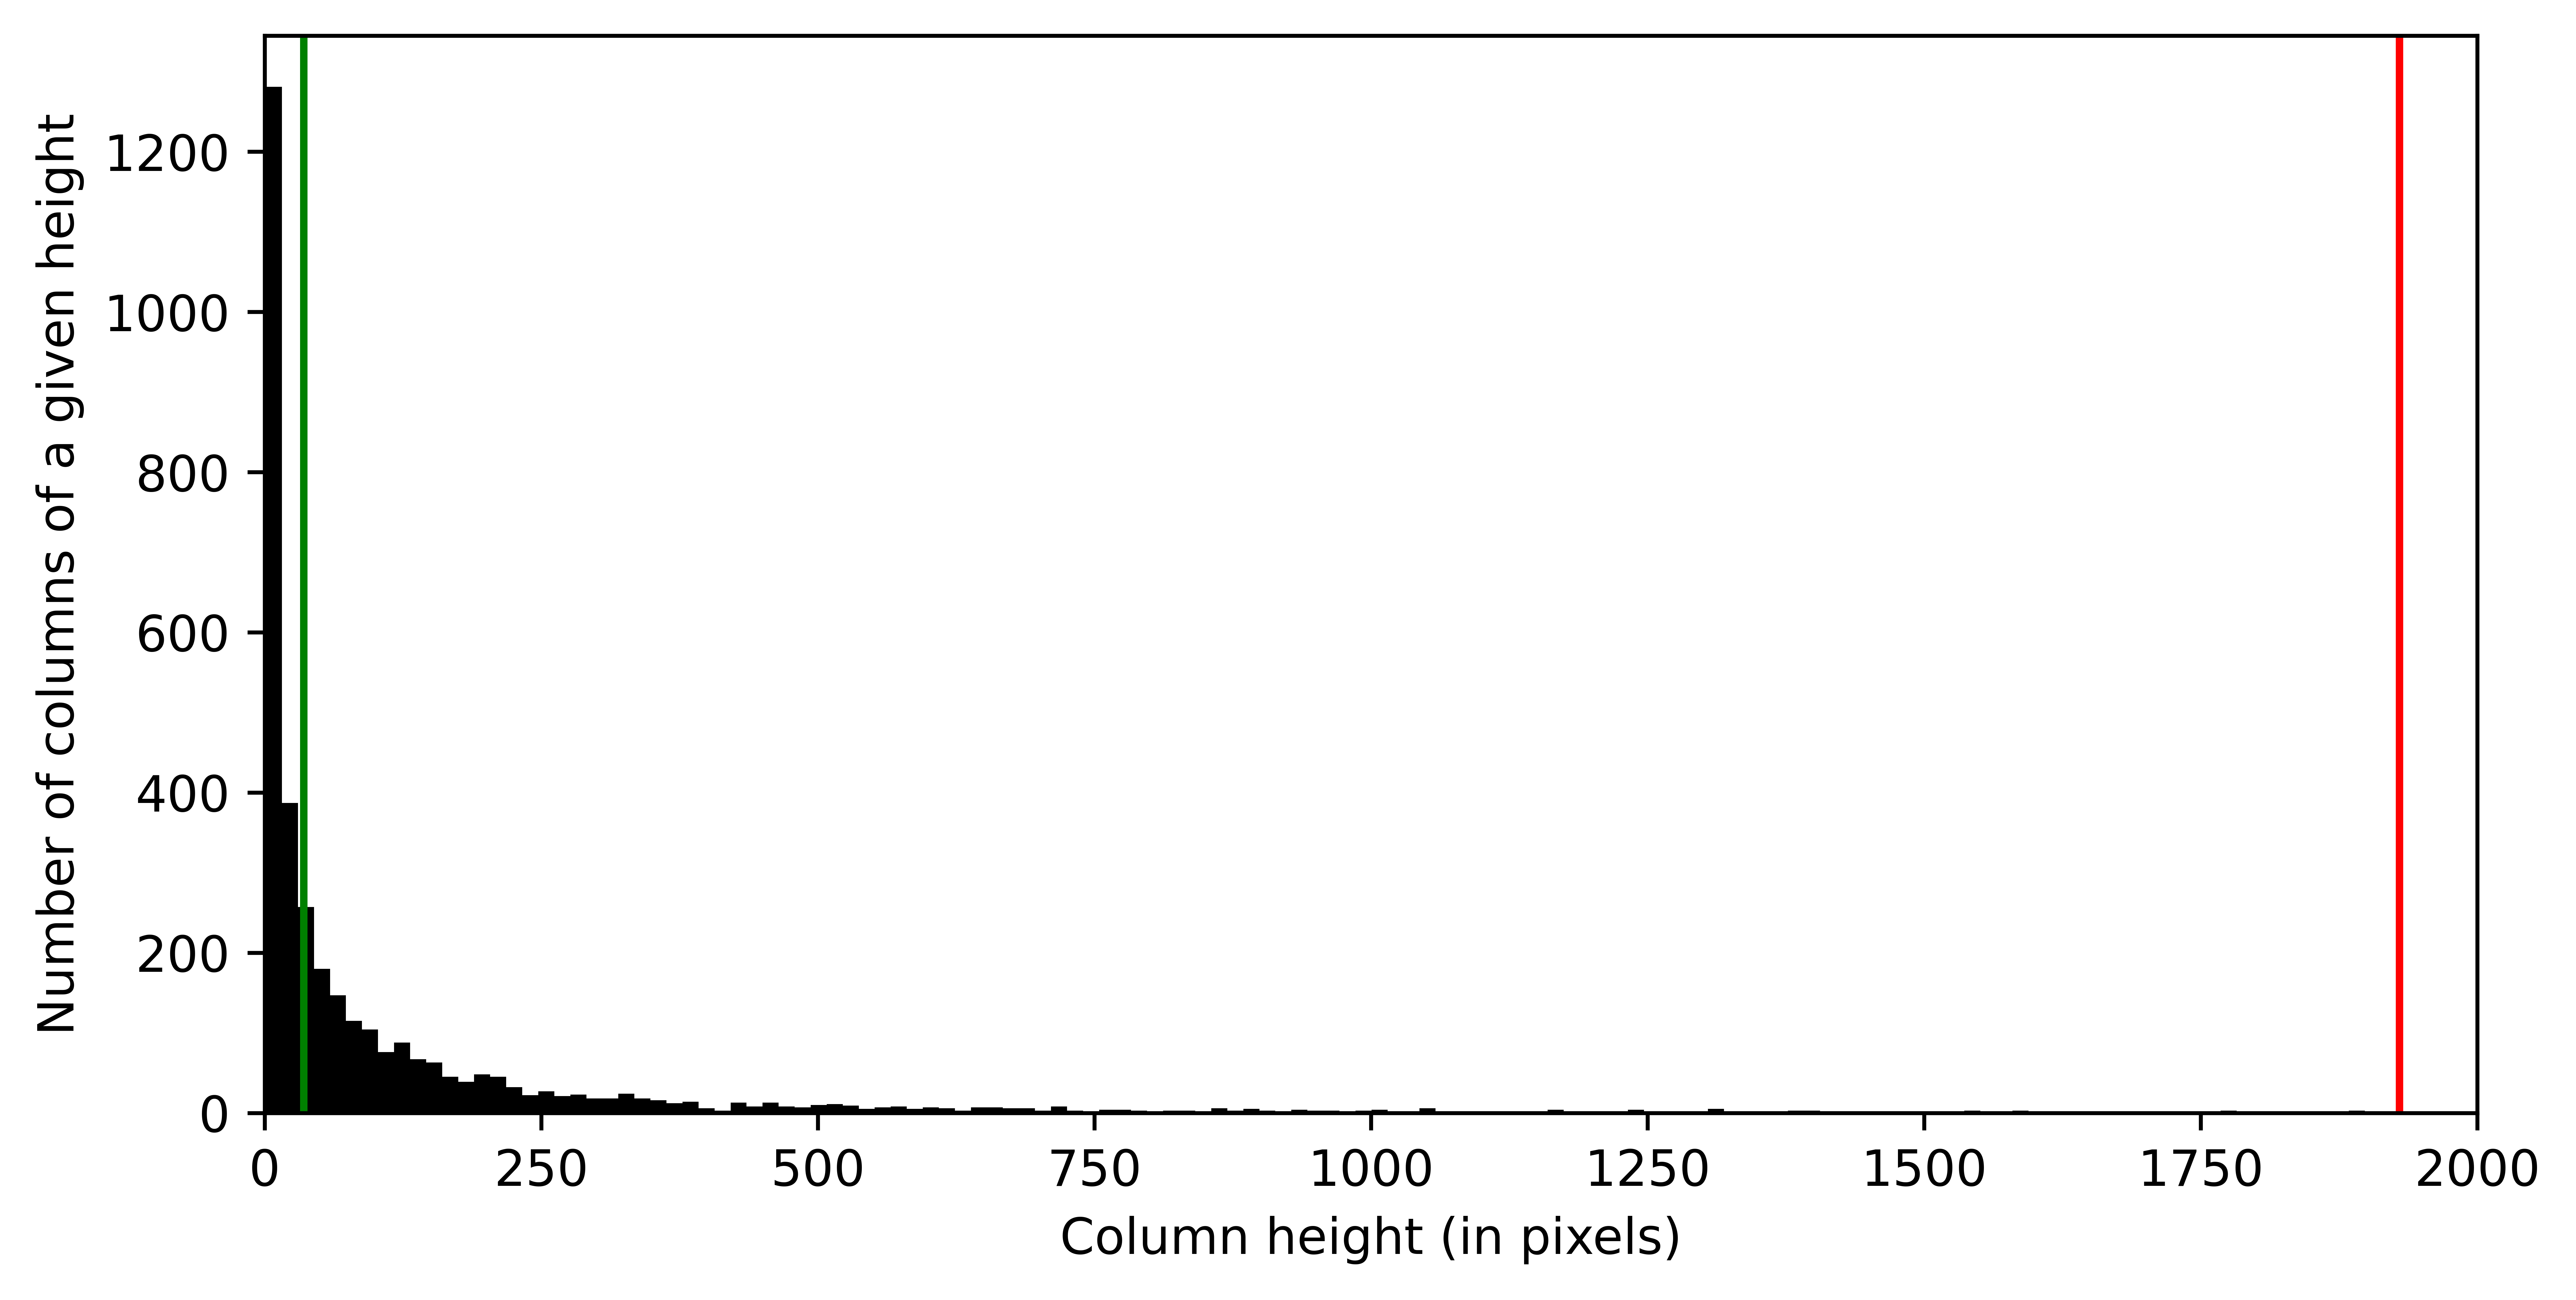

Mean:  133.03946239633973
Median:  33.0
Skewness:  3.57902812520862
Kurtosis:  14.84435875040299
Mode:  2
Std:  259.11000230683914
Std*1.5:  388.66500346025873
121.0
181.5
Median + std:  421.66500346025873
Median - std:  -355.66500346025873


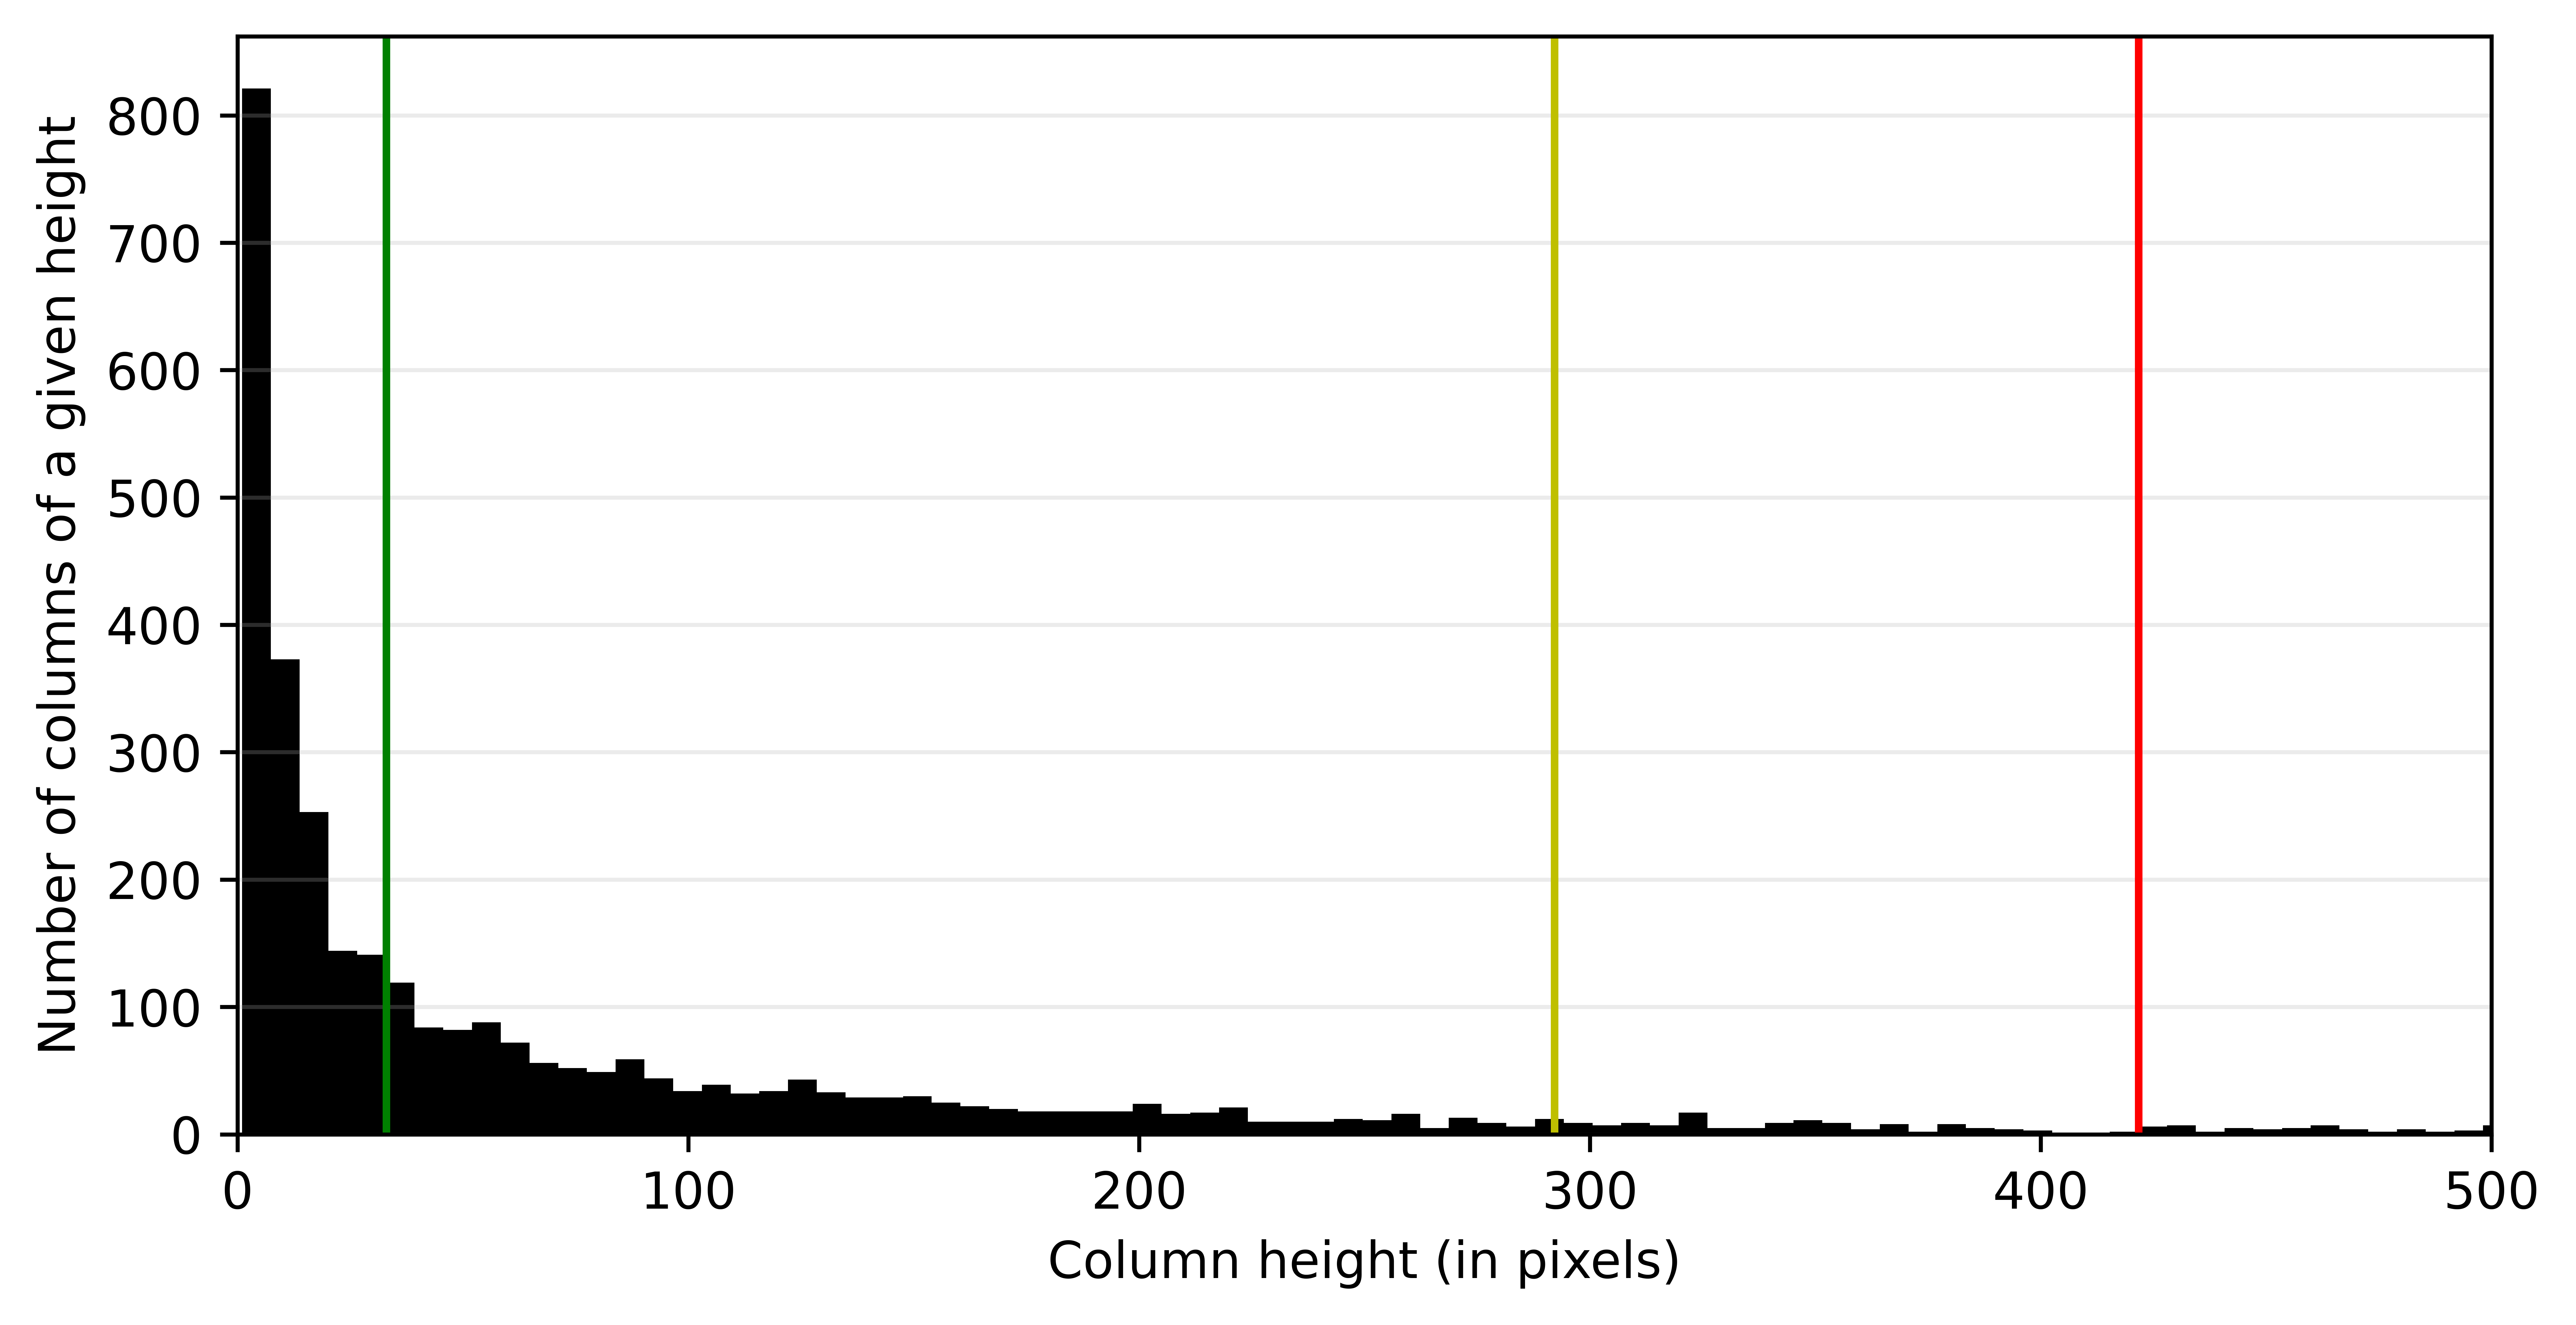

In [5]:

total_col_len = []
for x in file_list:
    current_mask = loadMask(x)
    # Sumamos en vertical, dándonos la longitud de cada fila
    total_col_len += assignLabel(current_mask)
    
total_col_len = np.array(total_col_len)


figure(figsize=(8, 4), dpi=1200)
print('Mean: ', np.mean(total_col_len))
print('Median: ', np.median(total_col_len))
print('Skewness: ', skew(total_col_len))
print('Kurtosis: ', kurtosis(total_col_len))
print('Mode: ', stats.mode(total_col_len)[0][0])
print('Std: ', np.std(total_col_len))

print('Median + std: ',np.median(total_col_len)+np.std(total_col_len)*1.5)
print('Median - std: ',np.median(total_col_len)-np.std(total_col_len)*1.5)

plt.hist(total_col_len,bins=5000,color='k')
plt.axvline(np.median(total_col_len),color='g')
plt.axvline(np.median(total_col_len) + np.std(total_col_len),color='r')
plt.axvline(np.median(total_col_len) - np.std(total_col_len),color='r')
plt.xlim((0,2000))
ax1 = plt.gca()
ax1.set_xlabel('Column height (in pixels)')
ax1.set_ylabel('Number of columns of a given height')
plt.savefig('columnplot.png', dpi=300, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=True, bbox_inches=None, pad_inches=0,
         metadata=None)
plt.show()


limit = np.median(total_col_len) + np.std(total_col_len)
total_col_len = []
for x in file_list:
    current_mask = loadMask(x)
    # Sumamos en vertical, dándonos la longitud de cada fila
    
    x = [r for r in assignLabel(current_mask) if r < limit]
    total_col_len += x
    
total_col_len = np.array(total_col_len)


figure(figsize=(8, 4), dpi=1200)
print('Mean: ', np.mean(total_col_len))
print('Median: ', np.median(total_col_len))
print('Skewness: ', skew(total_col_len))
print('Kurtosis: ', kurtosis(total_col_len))
print('Mode: ', stats.mode(total_col_len)[0][0])
print('Std: ', np.std(total_col_len))
print('Std*1.5: ', np.std(total_col_len*1.5))
q3, q1 = np.percentile(total_col_len, [75 ,25])
iqr = q3 - q1

print(iqr)
print(iqr*1.5)

print('Median + std: ',np.median(total_col_len)+np.std(total_col_len)*1.5)
print('Median - std: ',np.median(total_col_len)-np.std(total_col_len)*1.5)

plt.hist(total_col_len,bins=300,color='k')
plt.axvline(np.median(total_col_len),color='g')
plt.axvline(np.median(total_col_len) + np.std(total_col_len),color='y')
plt.axvline(np.median(total_col_len) - np.std(total_col_len),color='y')
plt.axvline(np.median(total_col_len) + np.std(total_col_len)*1.5,color='r')
plt.axvline(np.median(total_col_len) - np.std(total_col_len)*1.5,color='r')

plt.xlim((0,500))
ax1 = plt.gca()
ax1.grid(which='both',alpha=0.25,axis='y')
ax1.set_xlabel('Column height (in pixels)')
ax1.set_ylabel('Number of columns of a given height')
plt.savefig('columnplot.png', dpi=300, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=True, bbox_inches=None, pad_inches=0, metadata=None)
plt.show()

